# Bayesian example with continuous distributions
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/bayesian_estimation_continuous.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm
import seaborn as sns
import matplotlib as mpl

In [2]:
I_mu = 0.0
I_var = 2.0
X_lower = 1.0
X_upper = 2.0
y_obs_value = 3.5

### From scratch

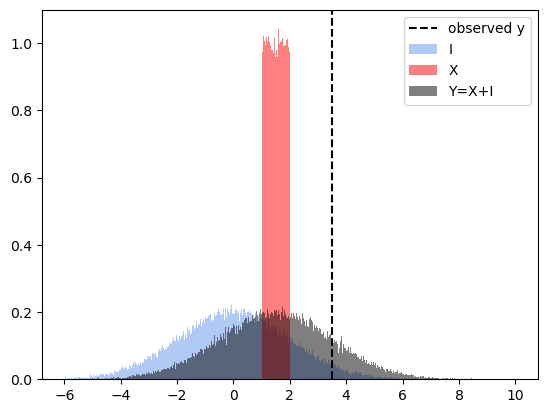

In [3]:
N = 100000
I = stats.norm.rvs(loc=I_mu, scale=I_var, size=N)
X = stats.uniform.rvs(loc=X_lower, scale=X_upper-X_lower, size=N)
Y = I + X

x_bins = np.linspace(-6., 10, 1000)
plt.axvline(y_obs_value, color='black', linestyle='--', label='observed y')
plt.hist(I, bins=x_bins, density=True, color="cornflowerblue", alpha=0.5, label='I')
plt.hist(X, bins=x_bins, density=True, color="red", alpha=0.5, label='X')
plt.hist(Y, bins=x_bins, density=True, color="black", alpha=0.5, label='Y=X+I')
plt.legend()
plt.show()


In [4]:
def computeCDF(x,val):
    p = len(x[x<=val])/len(x)
    return p

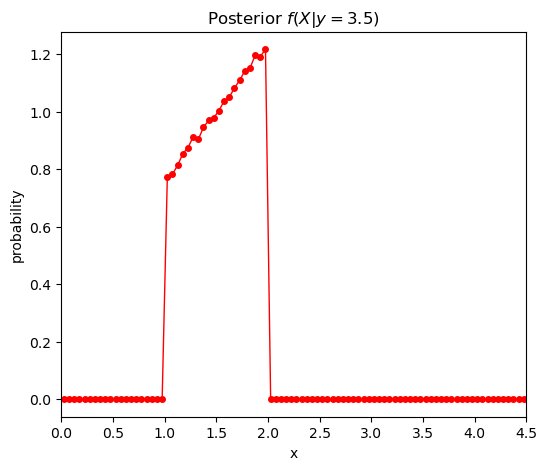

In [5]:
inc = 0.05
xvec = np.arange(-2.0 + inc / 2.0, 8.0 + inc / 2.0, inc)

# f_y(y_obs_value)
fy = computeCDF(Y, y_obs_value + inc / 2.0) - computeCDF(
    Y, y_obs_value - inc / 2.0
)

fx_y_expectation = []
fx_y = []

for x in xvec:

    # probability of y=y_obs given X=x is just the I(x) distribution centered around x
    # fy_x = stats.norm.cdf(yout+inc/2.,loc = xout,scale = var_w) - stats.norm.cdf(yout-inc/2.,loc = xout,scale = var_w)
    fy_x = stats.norm.cdf(y_obs_value + inc / 2.0, loc=x, scale=I_var) - stats.norm.cdf(
        y_obs_value - inc / 2.0, loc=x, scale=I_var
    )

    # probability that X=x
    fx = computeCDF(X,x+inc/2.) - computeCDF(X,x-inc/2.)

    a = fy_x * fx / fy

    fx_y.append(a)

fx_y = np.array(fx_y)
fx_y = fx_y / (np.sum(fx_y)*inc)
fx_y_expectation = np.sum(xvec * fx_y)

plt.figure(figsize=(6, 5))
plt.plot(xvec, fx_y, "o-", markersize=4, linewidth=1, color="red", label="empirical")

plt.xlim(0.0, 4.5)
# plt.ylim(0, 0.075)
plt.xlabel("x")
plt.title("Posterior $\mathit{f}(X | y = " + str(y_obs_value) + ")$")
plt.ylabel("density")

plt.show()

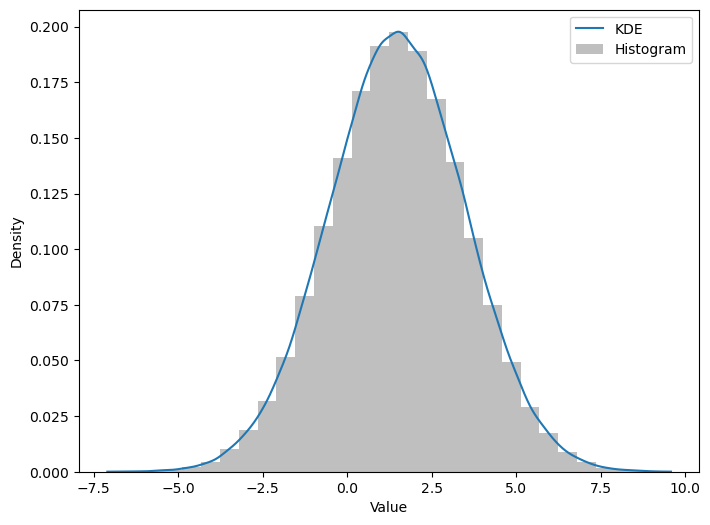

In [6]:
# Now do the computation using the PDFs instead of the CDFs (avoid numerical integration)
# note that this requires that we use a KDE approach to estimate the PDF of the prior Y

from scipy.stats import gaussian_kde
kde = gaussian_kde(Y)
x_pdf = np.linspace(min(Y), max(Y), 1000)
y_pdf = kde(x_pdf)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_pdf, y_pdf, label='KDE')
plt.hist(Y, bins=30, density=True, alpha=0.5, label='Histogram', color="gray")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

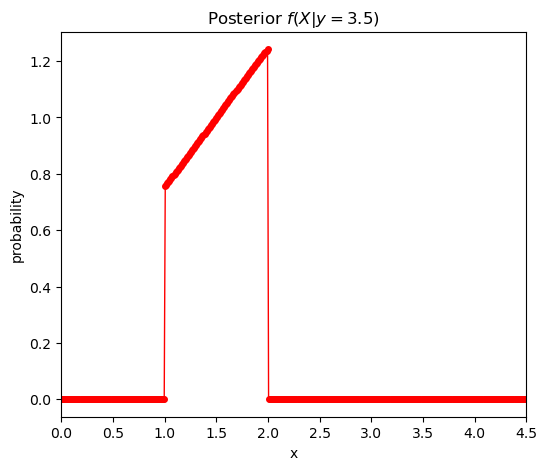

In [7]:
inc = 0.01
xvec = np.arange(-2.0 + inc / 2.0, 8.0 + inc / 2.0, inc)

# f_y(y_obs_value)
ix = np.abs(x_pdf - y_obs_value).argmin()
fy = y_pdf[ix]

fx_y_expectation = []
fx_y = []

for x in xvec:

    # probability of y=y_obs given X=x is just the I(x) distribution centered around x
    fy_x = stats.norm.pdf(y_obs_value, loc=x, scale=I_var)

    # probability that X=x
    fx = stats.uniform.pdf(x, loc=X_lower, scale=X_upper-X_lower)

    a = fy_x * fx / fy
    fx_y.append(a)

fx_y = np.array(fx_y)
fx_y = fx_y / (np.sum(fx_y)*inc)
fx_y_expectation = np.sum(xvec * fx_y)

plt.figure(figsize=(6, 5))
plt.plot(xvec, fx_y, "o-", markersize=4, linewidth=1, color="red", label="empirical")

plt.xlim(0.0, 4.5)
# plt.ylim(0, 0.075)
plt.xlabel("x")
plt.title("Posterior $\mathit{f}(X | y = " + str(y_obs_value) + " )$")
plt.ylabel("density")

plt.show()